### Part 3 Basic Stat Overview and Regression Analysis

#### 3.1 Read the data and load the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [2]:
cdc_20_21_stat = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

In [3]:
# drop the location column, for corr analysis:
cdc_regression = cdc_20_21_stat.drop(columns=['Location'])

Explore the possibility of combining two datasets:

In [4]:
describe_df = cdc_regression.describe()

In [9]:
describe_df.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/description_cols.csv', index = False)

In [5]:
#cdc_regression.var(axis = 0)

#### Basic Plots

In [6]:
pservice_col = ['Cervical cancer screening among adult women aged 21-65 years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
       'Mammography use among women aged 50-74 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
       'Cholesterol screening among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Visits to doctor for routine checkup within the past year among adults aged >=18 years']


In [7]:
health_outcomes_col = ['All teeth lost among adults aged >=65 years',
       'Arthritis among adults aged >=18 years',
       'Cancer (excluding skin cancer) among adults aged >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Mental health not good for >=14 days among adults aged >=18 years',
       'Depression among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'High cholesterol among adults aged >=18 years who have been screened in the past 5 years',
       'Obesity among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Stroke among adults aged >=18 years']

In [8]:
risky_beh = ['Sleeping less than 7 hours among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Current smoking among adults aged >=18 years',
       'No leisure-time physical activity among adults aged >=18 years']

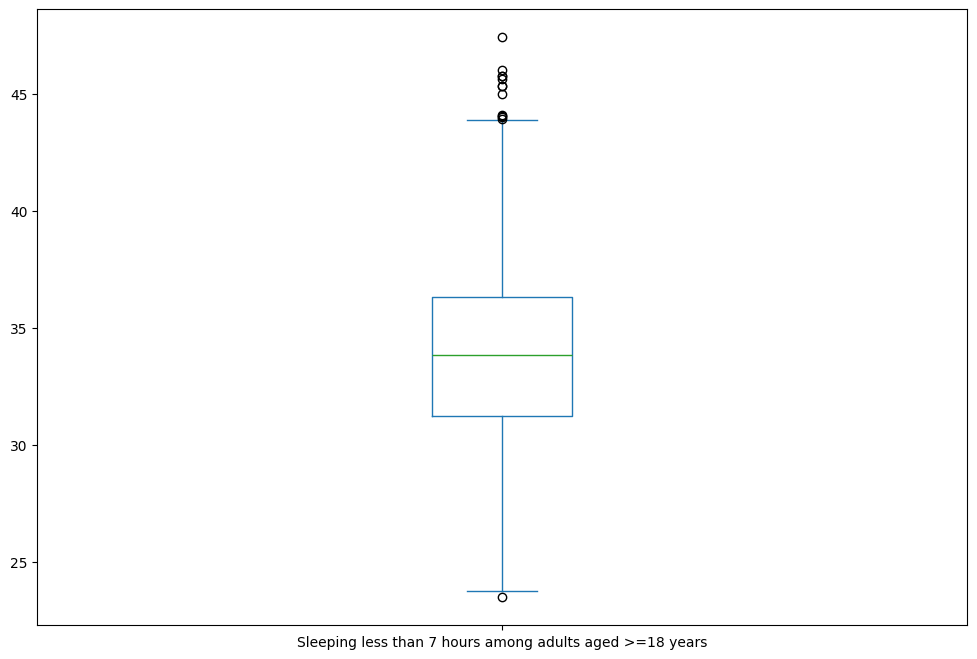

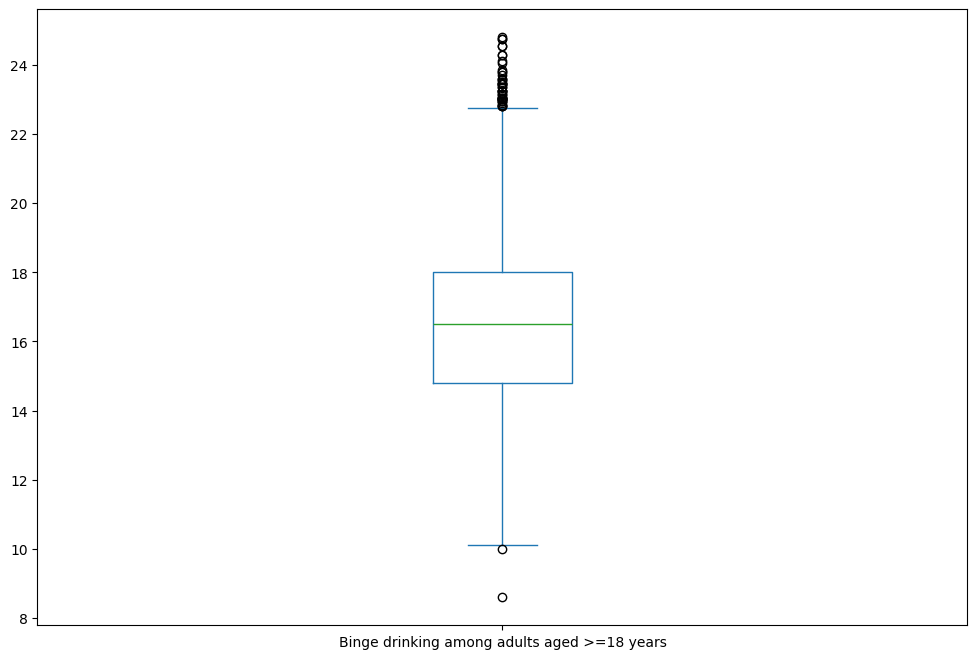

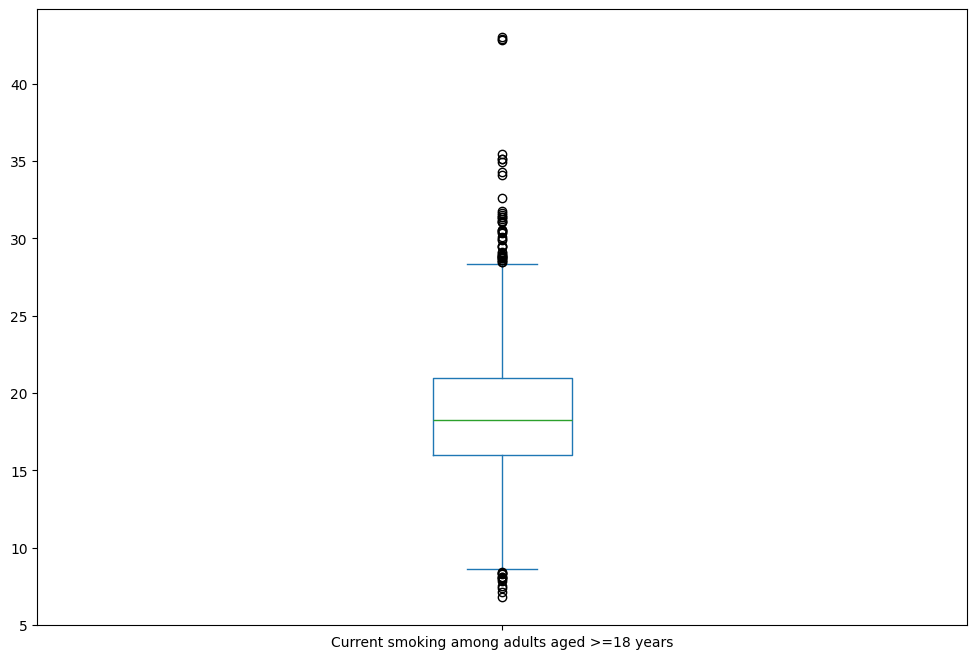

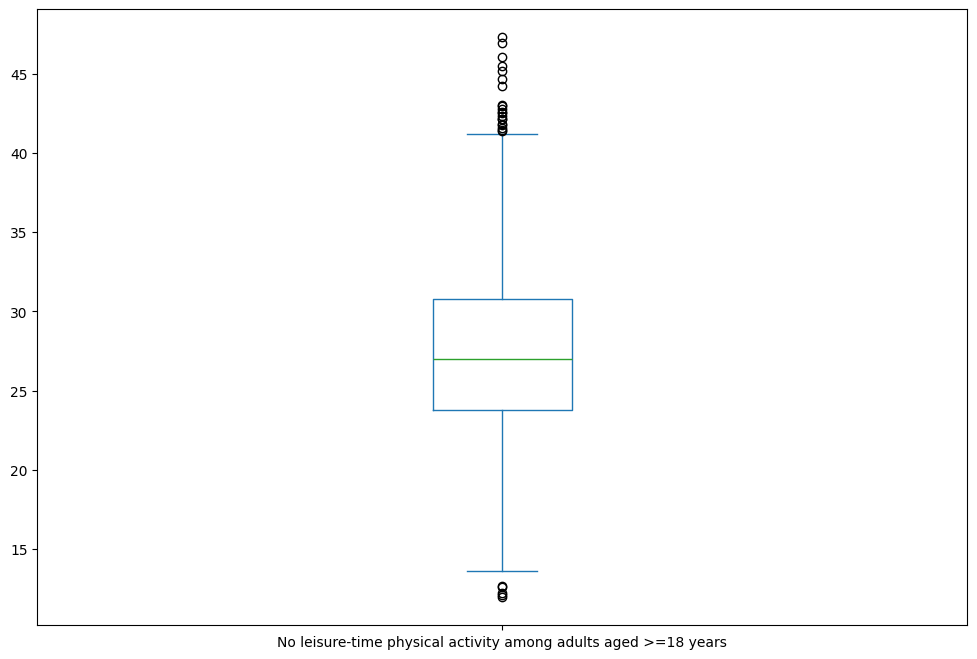

In [33]:
for column in risky_beh:
    fig, axs = plt.subplots(figsize = (12,8))  # Adjust the subplot grid to 4x3 and set the figure size
    cdc_regression.plot(kind='box', y=column, ax =axs)
    filename = column+".png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

Homogeneity of Variance Test (HOV)


Interpret results:

    Null hypothesis: Equal variances across groups.
    p-value < 0.05: Reject null hypothesis, indicating unequal variances.
    p-value >= 0.05: Fail to reject null hypothesis, suggesting equal variances.

Additional considerations:

    Visualizations: Use box plots or other visualizations to check variance patterns before testing.
    Alternative tests: Consider Bartlett's test for normally distributed data, but be cautious as it's more sensitive to normality violations.
    Handling unequal variances: If HOV test suggests unequal variances, use statistical methods that account for this (e.g., Welch's t-test instead of Student's t-test).

Remark:

    HOV tests are important assumptions for many statistical methods.
    Choose the appropriate test based on data distribution and research question.
    Interpret results carefully in the context of your analysis.



In [ ]:
import pandas as pd  # For data manipulation
from scipy.stats import levene  # For Levene's test

stat, p = levene(values[groups == 'group1'],  # Values for group 1
                 values[groups == 'group2'],  # Values for group 2
                 # ... add more groups if needed
                 center='median')  # Recommended for non-normal data

print("Statistic:", stat)
print("p-value:", p)

#### 3.2 Regression Analysis

##### 3.2.1 Simple linear regression
To better perform the regression, replace all the spaces in the colnames

In [12]:
cdc_regression.columns = cdc_regression.columns.str.replace(' ', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('(', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(')', '_')
cdc_regression.columns = cdc_regression.columns.str.replace(',', '_')
cdc_regression.columns = cdc_regression.columns.str.replace('>=', 'GE')

In [47]:
cdc_regression.columns = cdc_regression.columns.str.replace('-', 'to')

In [48]:
cdc_regression.columns

Index(['All_teeth_lost_among_adults_aged_GE65_years',
       'Cervical_cancer_screening_among_adult_women_aged_21to65_years',
       'Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years',
       'Mammography_use_among_women_aged_50to74_years',
       'Older_adult_men_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening',
       'Older_adult_women_aged_GE65_years_who_are_up_to_date_on_a_core_set_of_clinical_preventive_services:_Flu_shot_past_year__PPV_shot_ever__Colorectal_cancer_screening__and_Mammogram_past_2_years',
       'Sleeping_less_than_7_hours_among_adults_aged_GE18_years',
       'Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',
       'Any_disability_among_adults_aged_GE18_years',
       'Arthritis_among_adults_aged_GE18_years',
       'Binge_drinking_among_adults_aged_GE18_years',
       'Cancer__excluding_skin_cancer__among_adults_a

In [25]:
import statsmodels.formula.api as smf
# First, perform a simple linear regression analysis on the effect of depth on temperature

reg_cancer = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Binge_drinking_among_adults_aged_GE18_years',data= cdc_regression).fit()

In [26]:
print(reg_cancer.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.267
Model:                                                             OLS   Adj. R-squared:                  0.267
Method:                                                  Least Squares   F-statistic:                     1121.
Date:                                                 Wed, 17 Jan 2024   Prob (F-statistic):          7.39e-210
Time:                                                         04:00:00   Log-Likelihood:                -4156.9
No. Observations:                                                 3076   AIC:                             8318.
Df Residuals:                                                     3074   BIC:                             8330.
Df Model:                                                            1                                  

- The model's **R-squared value is 0.267**, which means approximately 26.7% of the variance in the dependent variable can be explained by the model's independent variable.
- The coefficient fo**r `Binge Drinking Prevalence` is -0.2308** , suggesting that for each unit increase in drinking prevalence the Coronary Heart Disease Prevalence is expected t odecrease 0.2308.
- The p-values for both the intercept and the `Binge Drinking Prevalence` coefficient **are very small** (close to 0), indicating that these results are statistically significant.
- Additional model statistics, such as **the Durbin-Watson value of 1.347**, suggest the possibility of positive autocorrelation. 
- **The Jarque-Bera (JB)** test result is significantly high, with a p-value close to 0, indicating that the residuals do not follow a normal distribution. This could impact the validity of certain inferential statistics, such as confidence intervals and hypothesis tets.

In [28]:
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# The order of results: intercept term, slope term
beta_0, beta_1 = reg_cancer.params
rsq    = reg_cancer.rsquared
pval_0, pval_1 = reg_cancer.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of binge drinking = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.231 x + 10.562
R^2 =  0.2672638474328437
p-value of binge drinking =  0.0
p-value of intercept =  0.0


y = -0.231 x + 10.562
Rsq =  0.2672638474328437
p-value of Binge Drinking Prevalence =  7.390742640405772e-210


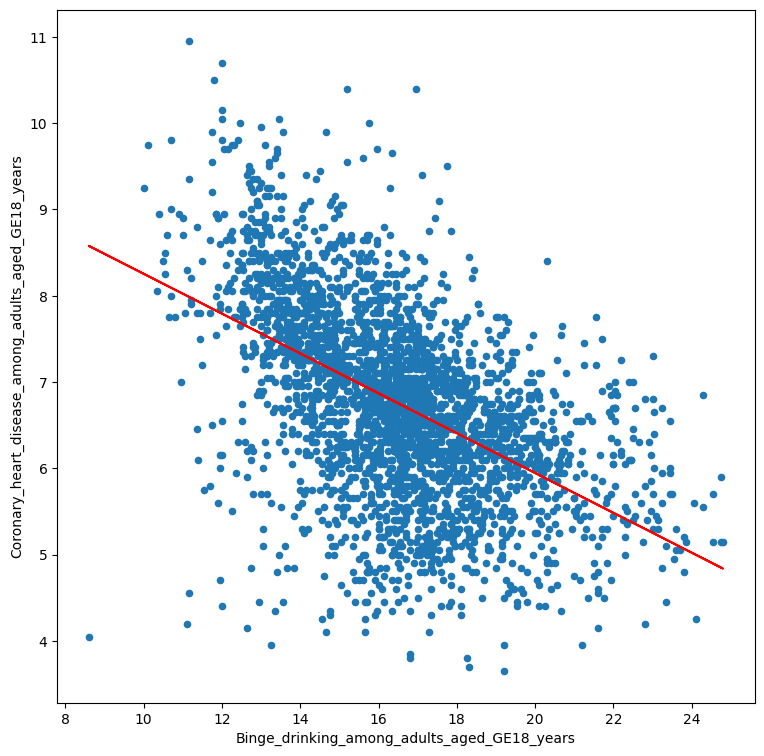

In [33]:
# plot the result
fig, ax = plt.subplots()
cdc_regression.plot(kind='scatter', x='Binge_drinking_among_adults_aged_GE18_years', y='Coronary_heart_disease_among_adults_aged_GE18_years', figsize=(9, 9), ax = ax)

X = cdc_regression.Binge_drinking_among_adults_aged_GE18_years
b = plt.plot(X, X*beta_1 + beta_0, 'r') # regression line

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of Binge Drinking Prevalence = ", pval_1)

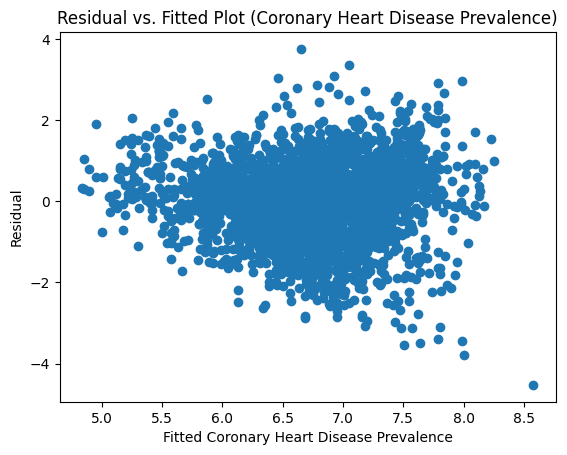

In [38]:
# plot 
plt.scatter(reg_cancer.fittedvalues, reg_cancer.resid)
# adding title and labels
plt.xlabel('Fitted Coronary Heart Disease Prevalence')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot (Coronary Heart Disease Prevalence)')
plt.show()

Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between depth and tempearture (and thus $\beta_0$ equals zero)
- **alternative hypothesis:** There is a relationship between depth and tempearture (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [35]:
reg_cancer.pvalues

Intercept                                       0.000000e+00
Binge_drinking_among_adults_aged_GE18_years    7.390743e-210
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for depth is far less than 0.05, and so we **believe** that there is a relationship between depth and tempearture.

Note that we generally ignore the p-value for the intercept.

In [40]:
# Similarly

reg_ch_smoking = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Current_smoking_among_adults_aged_GE18_years',data=cdc_regression).fit()

# And this gives a big summary of the results:
print(reg_ch_smoking.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.697
Model:                                                             OLS   Adj. R-squared:                  0.697
Method:                                                  Least Squares   F-statistic:                     7064.
Date:                                                 Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                                         04:14:56   Log-Likelihood:                -2799.9
No. Observations:                                                 3076   AIC:                             5604.
Df Residuals:                                                     3074   BIC:                             5616.
Df Model:                                                            1                                  

The R square is much better!

##### 3.2.2 Multi-linear regression

In [49]:
# create a fitted model with all three features
reg_chd = smf.ols(formula='Coronary_heart_disease_among_adults_aged_GE18_years ~ Sleeping_less_than_7_hours_among_adults_aged_GE18_years + Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years + Cervical_cancer_screening_among_adult_women_aged_21to65_years +Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years',data=cdc_regression).fit()

# print the coefficients
reg_chd.params

Intercept                                                                                10.776328
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                   0.010041
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years     0.016896
Cervical_cancer_screening_among_adult_women_aged_21to65_years                             0.008645
Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years                          -0.104965
dtype: float64

In [50]:
reg_chd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Coronary_heart_disease_among_adults_aged_GE18_years   R-squared:                       0.485
Model:                                                             OLS   Adj. R-squared:                  0.484
Method:                                                  Least Squares   F-statistic:                     723.4
Date:                                                 Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                                         04:28:31   Log-Likelihood:                -3614.1
No. Observations:                                                 3076   AIC:                             7238.
Df Residuals:                                                     3071   BIC:                             7268.
Df Model:                                                            4                                         
Covariance Type:                                             nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                10.7763      0.586     18.380      0.000       9.627      11.926
Sleeping_less_than_7_hours_among_adults_aged_GE18_years                                   0.0100      0.006      1.778      0.076      -0.001       0.021
Fecal_occult_blood_test__sigmoidoscopy__or_colonoscopy_among_adults_aged_50to75_years     0.0169      0.004      3.901      0.000       0.008       0.025
Cervical_cancer_screening_among_adult_women_aged_21to65_years                             0.0086      0.010      0.898      0.369      -0.010       0.028
Visits_to_dentist_or_dental_clinic_among_adults_aged_GE18_years                          -0.1050      0.004    -29.265      0.000      -0.112      -0.098
==============================================================================
Omnibus:                       10.157   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.279
Skew:                          -0.050   Prob(JB):                      0.00216
Kurtosis:                       3.293   Cond. No.                     5.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(reg_tdegc.fittedvalues, reg_tdegc.resid, alpha = 0.5, s=5)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted temperature')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Ocean Temperature')
# Adding grid lines
plt.grid(True)
plt.show()

In [ ]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_tdegc.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
import statsmodels.api as sm

# Q-Q plot
fig = sm.qqplot(reg_tdegc.resid, fit=True, line="45")
plt.title('Q-Q Plot of Residuals')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

__VIF__

In [51]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
         # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [ ]:
df_seawater_data_cleaned_drop = df_seawater_data_cleaned.drop(['Sta_ID', 'Depth_ID','Lat', 'Long', 'Date', 'Time'], axis=1)

df_seawater_data_cleaned_new = drop_column_using_vif_(df_seawater_data_cleaned_drop.drop('T_degC', axis=1))

In [ ]:
df_seawater_data_cleaned_new.info

In [ ]:
import statsmodels.api as sm

# create the new fitted model with all three features
reg_seawater_data_cleaned_new = sm.OLS(endog=df_seawater_data_cleaned[['T_degC']], exog=sm.add_constant(df_seawater_data_cleaned_new)).fit()

# print the new coefficients
reg_seawater_data_cleaned_new.params

In [ ]:
# print a summary of the fitted model
reg_seawater_data_cleaned_new.summary()

__Residual Analysis__

In [ ]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(reg_seawater_data_cleaned_new.fittedvalues, reg_seawater_data_cleaned_new.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted temperature')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Ocean Temperature')
# Adding grid lines
plt.grid(True)
plt.show()

In [ ]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(reg_seawater_data_cleaned_new.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Q-Q plot
fig = sm.qqplot(reg_seawater_data_cleaned_new.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Group according to 'Month' and calculate the average value of each group
monthly_avg_temp2 = df_seawater_data_cleaned3_seperate2.groupby('Month')['T_degC'].mean()

# Draw a line chart with the month on the x-axis and the average temperature on the y-axis
monthly_avg_temp2.plot(kind='line', figsize=(10, 5))

# Set chart titles and axis labels
plt.title('Average Sea Water Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')

# Show the chart
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
# Residuals vs. Fitted plot

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(reg_tdegc.fittedvalues, reg_tdegc.resid, alpha = 0.5, s=5)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted temperature')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Ocean Temperature')
# Adding grid lines
plt.grid(True)
plt.show()

smoking and tobacco sales in states, counties, etc.

#### 3.3 XGBoost
